# 第３ステージ　高階微分を実現する

## ステップ２５〜２７
省略

## ステップ28 関数の最適化
### 28.1 ローゼンブロック関数
ローゼンブロック関数は$y=100(x_1-{x_0}^2)^2+(x_0-1)^2$で表される。
<br>

### 28.2 微分を求める
ローゼンブロック関数の$(x_0,x_1)=(0.0,2.0)$における$\frac{\partial y}{\partial x_0}, \frac{\partial y}{\partial x_1}$を求めてみる。

In [1]:
import numpy as np
from leopard import Variable

In [2]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0**2) ** 2 + (x0 - 1) ** 2
    return y

In [3]:
x0 = Variable(np.array(0.))
x1 = Variable(np.array(2.))

y = rosenbrock(x0, x1)
y.backward()
x0.grad, x1.grad

(-2.0, 400.0)

### 28.3 勾配降下法の実装
勾配降下法を使って、ローゼンブロック関数の最小値を見つける<br>
勾配降下法の更新式は以下のようになる。
$$w_{j+1} = w_j - \eta \frac{\partial z}{\partial w_j}$$

In [4]:
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)

f = lambda x, y: ((x-1)**2 + (y-x**2)**2)
Z = f(X, Y)

In [5]:
import matplotlib.pyplot as plt

In [48]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

x0_list, x1_list = [], []

In [49]:
lr = 0.001 # 学習率
iters = 50000 # 繰り返す回数

for i in range(iters):
    x0_list.append(x0.data.copy())
    x1_list.append(x1.data.copy())

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

print(f'{x0.data:.4f}, {x1.data:.4f}')

1.0000, 1.0000


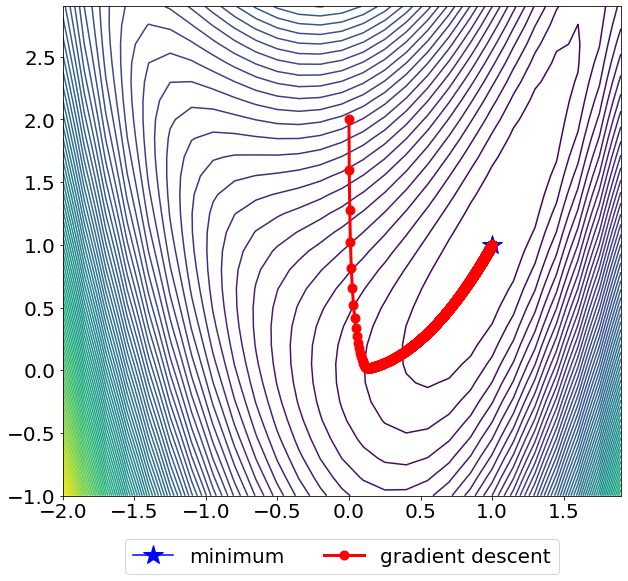

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
ax.contour(X, Y, Z, 100)
ax.plot(1, 1,  marker='*', color='blue', markersize=20, label='minimum')
ax.plot(x0_list, x1_list, marker='o', linewidth=3, markersize=9, color='red', label='gradient descent')
ax.legend(fontsize=20, loc='lower center', bbox_to_anchor=(0.5, -0.18), ncol=2)
ax.tick_params(axis='both', labelsize=20)